# 1.data distribution

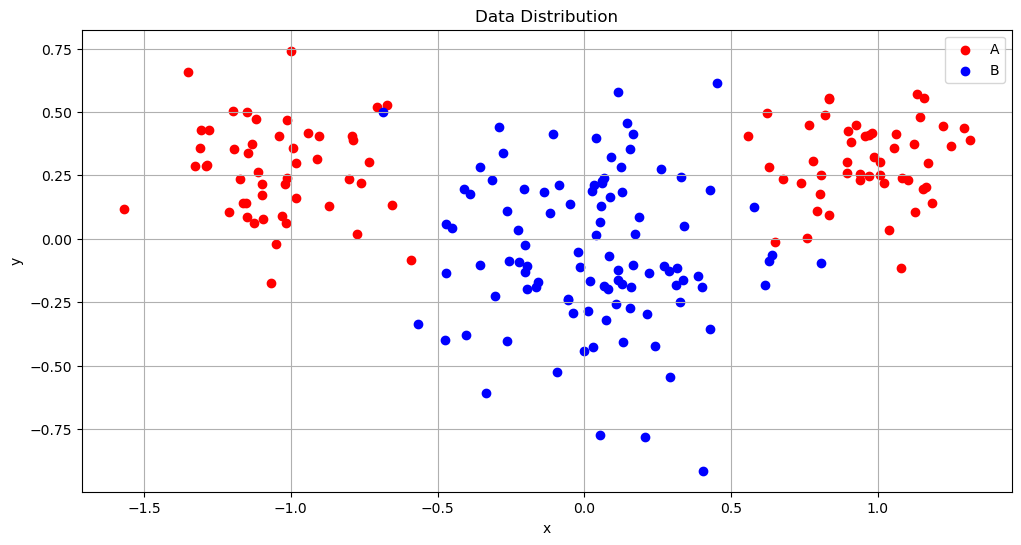

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#parameters
n = 100
mA = np.array([1.0, 0.3])
mB = np.array([0.0, -0.1])
sigmaA = 0.2
sigmaB = 0.3

#generate data
classA_x = np.concatenate((np.random.randn(1, round(0.5*n)) * sigmaA - mA[0],
                                np.random.randn(1, round(0.5*n)) * sigmaA + mA[0]), axis=1)
classA_y = np.random.randn(1, n)*sigmaA + mA[1]
ClassA = np.concatenate((classA_x, classA_y), axis=0) #2*n matrix
ClassB = np.random.randn(2,n)*sigmaB + mB.reshape(2,1)  #2*n matrix

#plot data
plt.figure(figsize=(12, 6))
plt.scatter(ClassA[0, :], ClassA[1, :], c='r', label='A')
plt.scatter(ClassB[0, :], ClassB[1, :], c='b', label='B')
plt.title("Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
ClassA.shape

(2, 100)

# 2.Model class

In [27]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.W = np.random.normal(loc=0,scale=1, size=(hidden_size, input_size+ 1)) # input to hidden
        self.v = np.random.normal(loc=0,scale=1, size=(output_size, hidden_size+ 1 )) # hidden to output
        self.dw = np.zeros(self.W.shape)
        self.dv = np.zeros(self.v.shape)

    def transfer_function(self, x):
        return 2 / (1 + np.exp(-x)) - 1

    def TF_derivative(self, x):
        derivative = self.transfer_function(x)
        return (1 + derivative) * (1 - derivative) / 2

    def forward(self, X):
        X = np.vstack((X, np.ones((1, X.shape[1])))) # (D+1)*N
        self.hin = np.dot(self.W , X)
        hout = self.transfer_function(self.hin)# H*N

        self.hout = np.vstack((hout, np.ones((1,hout.shape[1])))) # (H+1)*N
        self.oin = np.dot(self.v, self.hout)# O*N
        self.out = self.transfer_function(self.oin) # O*N
        return self.out
    

    def backward(self, X, T, output):
        #m = X.shape[1]
        X = np.vstack((X, np.ones((1, X.shape[1])))) # (D+1)*N
        m = 1
        delta_out = (output - T) * self.TF_derivative(self.oin)# O*N
        dV = np.dot(delta_out, self.hout.T) / m

        delta_hidden = np.dot(self.v[:, :-1].T,delta_out) * self.TF_derivative(self.hin)# H*N
        dW = np.dot(delta_hidden, X.T) / m
        self.dW_current, self.dV_current = dW, dV

    def weight_update(self, learning_rate,alpha=0.9):
        self.dv = alpha * self.dv - (1 - alpha) * self.dV_current
        self.dw = alpha * self.dw - (1 - alpha) * self.dW_current
        self.W += learning_rate * self.dw
        self.v += learning_rate * self.dv

    def mse(self, output, target):
        return np.mean((output - target) ** 2)

In [16]:
labels = np.concatenate((np.ones(n), -np.ones(n))).reshape(1,200) #1 for class A 
labels.shape
class_total = np.concatenate((ClassA, ClassB), axis=1)

In [29]:
#parameters
input_size = class_total.shape[0]
hidden_size = 4
output_size = 1
learning_rate = 0.001
epochs = 50
alpha = 0.9

mlp = MLP(input_size, hidden_size, output_size)
mse_list = []

for epoch in range(epochs):
    output = mlp.forward(class_total)
    loss = mlp.mse(output, labels)
    mse_list.append(loss)

    mlp.backward(class_total, labels, output)
    mlp.weight_update(learning_rate,alpha)
    if (epoch + 1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], MSE: {loss:.4f}")

Epoch [5/50], MSE: 1.6647
Epoch [10/50], MSE: 1.6113
Epoch [15/50], MSE: 1.5236
Epoch [20/50], MSE: 1.4010
Epoch [25/50], MSE: 1.2518
Epoch [30/50], MSE: 1.1075
Epoch [35/50], MSE: 1.0118
Epoch [40/50], MSE: 0.9766
Epoch [45/50], MSE: 0.9723
Epoch [50/50], MSE: 0.9700
